In [1]:
import pandas as pd
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [3]:
price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

df["price"] = price
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [4]:
features = ["model_year", "price"]

df[features].corr()

,model_year,price
model_year,1.000000,0.199496
price,0.199496,1.000000


In [5]:
age = df["model_year"].max() - df["model_year"]
print(age)

0       11
1        3
2        2
3        9
4        3
        ..
4004     1
4005     2
4006     2
4007     4
4008     4
Name: model_year, Length: 4009, dtype: int64


In [6]:
milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)
print(milage)

0       51000
1       34742
2       22372
3       88900
4        9835
        ...  
4004      714
4005    10900
4006     2116
4007    33000
4008    43000
Name: milage, Length: 4009, dtype: int32


In [7]:
# Change data into tensors

X = torch.column_stack([
    torch.tensor(age, dtype = torch.float32),
    torch.tensor(milage, dtype = torch.float32)
])

y = torch.tensor(price, dtype = torch.float32).reshape(-1, 1)

In [8]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Normalize train data

X_train_mean = X_train.mean(0)
X_train_std = X_train.std(0)
X_train = (X_train - X_train_mean) / X_train_std

y_train_mean = y_train.mean()
y_train_std = y_train.std()
y_train = (y_train - y_train_mean) / y_train_std

In [10]:
# Create a model

model = nn.Linear(2, 1) # two inputs and one output

In [11]:
# Set a loss function

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

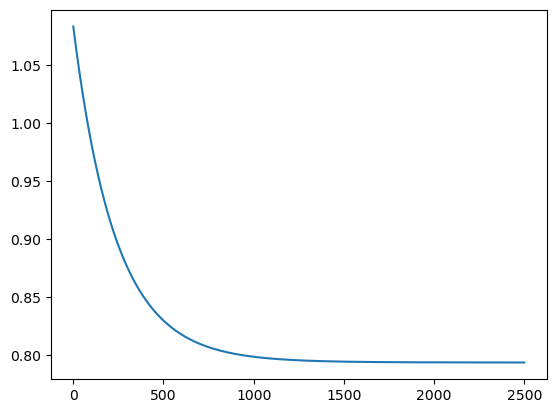

In [12]:
# Train the model

losses = []

for i in range(0, 2500):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
plt.plot(losses)
plt.show()

In [13]:
# Evalue the model

X_test = (X_test - X_train_mean) / X_train_std # 테스트 데이터도 훈련 데이터로 정규화
y_test = (y_test - y_train_mean) / y_train_std

y_pred = model(X_test)
mse = loss_fn(y_pred, y_test)
rmse = torch.sqrt(mse) * y_train_std

print(f"Test RMSE (Original Scale): {rmse.item()}")

Test RMSE (Original Scale): 140856.421875


In [15]:
# Predict

X_data = model(torch.tensor([
    [5, 10000],
    [2, 10000]
], dtype = torch.float32))

X_data = (X_data - X_train_mean) / X_train_std

predictions = model(X_data) * y_train_std + y_train_mean

print(predictions)

tensor([[3944089.0000],
        [3943698.2500]], grad_fn=<AddBackward0>)
